In [33]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from thunder import KMeans, NMF, PCA, RegressionModel, Colorize
import numpy as np
import scipy.io
import math
from numpy import amin, amax, ravel, sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
image = Colorize.image
sns.set_context('notebook')
sns.set_style('ticks')
plt.ioff()


def analysis( norm,dirnumber,directory,stimparam ):
      
# 	fig = figure(dpi=300)
# 	model = NMF(k=18, maxIter=100).fit(norm)
# 	plt.plot(model.h.T[:,0:3])
# 	plt.savefig('/mnt/downloads/'+directory+'/NMF-'+str(dirnumber)+'-1.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	plt.plot(model.h.T[:,3:6])
# 	plt.savefig('/mnt/downloads/'+directory+'/NMF-'+str(dirnumber)+'-2.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	plt.plot(model.h.T[:,6:9])
# 	plt.savefig('/mnt/downloads/'+directory+'/NMF-'+str(dirnumber)+'-3.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	plt.plot(model.h.T[:,9:12])
# 	plt.savefig('/mnt/downloads/'+directory+'/NMF-'+str(dirnumber)+'-4.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	plt.plot(model.h.T[:,12:15])
# 	plt.savefig('/mnt/downloads/'+directory+'/NMF-'+str(dirnumber)+'-5.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	plt.plot(model.h.T[:,15:18])
# 	plt.savefig('/mnt/downloads/'+directory+'/NMF-'+str(dirnumber)+'-6.png', dpi=300, bbox_inches='tight')
# 	imgs = model.w.pack()
# 	fig = figure(dpi=300)
# # 	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs)
# 	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[0:3])
# 	plt.imshow(maps);
# 	plt.savefig('/mnt/downloads/'+directory+'/NMFb-'+str(dirnumber)+'-1.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[3:6])
# 	plt.imshow(maps);
# 	plt.savefig('/mnt/downloads/'+directory+'/NMFb-'+str(dirnumber)+'-2.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[6:9])
# 	plt.imshow(maps);
# 	plt.savefig('/mnt/downloads/'+directory+'/NMFb-'+str(dirnumber)+'-3.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[9:12])
# 	plt.imshow(maps);
# 	plt.savefig('/mnt/downloads/'+directory+'/NMFb-'+str(dirnumber)+'-4.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[12:15])
# 	plt.imshow(maps);
# 	plt.savefig('/mnt/downloads/'+directory+'/NMFb-'+str(dirnumber)+'-5.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[15:18])
# 	plt.imshow(maps);
# 	plt.savefig('/mnt/downloads/'+directory+'/NMFb-'+str(dirnumber)+'-6.png', dpi=300, bbox_inches='tight')
# 	scipy.io.savemat('/mnt/downloads/'+directory+'/NMF-'+str(dirnumber)+'.mat', mdict={'W':imgs,'H':model.h.T}, oned_as='column', do_compression='true')

  
	yplot=int(math.ceil(float(stimparam.shape[0])/(math.trunc(stimparam.shape[0]**(0.5)))))
	xplot=math.trunc(stimparam.shape[0]**(0.5))  
	model = RegressionModel.load(test, "linear")
	global results
	results = model.fit(norm)
	betas=results.select('betas').pack()
	rsq=results.select('stats').pack()
	fig = figure(dpi=300)
	plt.subplots(xplot, yplot, sharex=True, sharey=True)
	for j in range(0,stimparam.shape[0]):
		plt.subplot(xplot, yplot, j+1);
		plt.imshow(betas[j], cmap='RdBu_r')
		ax = plt.gca()
		ax.set_xticklabels([])
		ax.set_yticklabels([])
	plt.savefig('/mnt/downloads/'+directory+'/linreg-'+str(dirnumber)+'.png', dpi=300, bbox_inches='tight')
	scipy.io.savemat('/mnt/downloads/'+directory+'/linreg-'+str(dirnumber)+'.mat', mdict={'betas':betas,'rsq':rsq}, oned_as='column', do_compression='true')

	corrMat=np.zeros((stimparam.shape[0],norm.dims[0],norm.dims[1]),dtype=np.float64)
    
	fig = figure(dpi=300)
	plt.subplots(xplot, yplot, sharex=True, sharey=True)
	for j in range(0,stimparam.shape[0]):
		x = test[j]        
		corrs = norm.correlate(x)
		corrMat[j] = corrs.pack()
		plt.subplot(xplot, yplot, j+1);
		plt.imshow(corrMat[j], cmap='RdBu_r')
		ax = plt.gca()
		ax.set_xticklabels([])
		ax.set_yticklabels([])
	scipy.io.savemat('/mnt/downloads/'+directory+'/correlation-'+str(dirnumber)+'.mat', mdict={'correlations':corrMat}, oned_as='column', do_compression='true')
	plt.savefig('/mnt/downloads/'+directory+'/correlation-'+str(dirnumber)+'.png', dpi=300, bbox_inches='tight')
    
	return

In [34]:
test=scipy.io.loadmat('/mnt/downloads/Neuropil/traces.mat')['CorrTraces']

In [ ]:
directory='Neuropilresult'
for i in range(236,331):
	norm = tsc.loadImages('/mnt/downloads/Neuropil/'+str(i)+'/', inputFormat='tif')
	norm.cache()
	norm = norm.toTimeSeries(size="32M")
	norm=norm.squelch(50).normalize(baseline='percentile')
	norm.cache()
	analysis(norm,i,directory,test)
	plt.close("all")

In [4]:
stimparam=np.zeros((1,200),dtype=np.int)
corrMat=np.zeros((stimparam.shape[0],stimparam.shape[1]),dtype=np.float64)

In [12]:
arr=norm.pack()

In [23]:
shape(arr2)

(360, 448, 353)

In [22]:
arr2=np.pad(arr,((0,7),(0,0),(0,0)),'edge')

In [30]:
norm = tsc.loadSeries('/mnt/downloads/temp/arr2.npy',nvalues=360,inputFormat='npy')

IOError: Input data must be one or two dimensional

In [70]:
mdict={}
for j in range(0,test.shape[0]):
    corrMat[j] = test[j]
    mdict['correlation'+str(j)]=str(corrMat['+str(j)+'])

ValueError: could not broadcast input array from shape (360) into shape (600)

In [24]:
plt.ioff()

In [28]:
np.save('/mnt/downloads/temp/arr2.npy',arr2)

In [57]:
shape(norm)

()

In [31]:
tsc.export(norm,'/mnt/downloads/temp/arr3.npy')

Exception: It appears that you are attempting to broadcast an RDD or reference an RDD from an action or transformation. RDD transformations and actions can only be invoked by the driver, not inside of other transformations; for example, rdd1.map(lambda x: rdd2.values.count() * x) is invalid because the values transformation and count action cannot be performed inside of the rdd1.map transformation. For more information, see SPARK-5063.

In [32]:
norm

TimeSeries
nrecords: None (inspect to compute)
dtype: None (inspect to compute)
dims: min=(0, 0), max=(447, 352), count=(448, 353)
index: [  0   1   2   3   4   5   6   7   8   9  10  11 ... ] (length: 353)

In [75]:
norm = tsc.loadImages('/mnt/downloads/Neuropil/1/', inputFormat='tif')

In [76]:
	norm.cache()
	norm = norm.toTimeSeries(size="32M")
	norm=norm.squelch(50).normalize(baseline='percentile')
	norm.cache()

TimeSeries
nrecords: None (inspect to compute)
dtype: None (inspect to compute)
dims: min=(0, 0), max=(503, 411), count=(504, 412)
index: [  0   1   2   3   4   5   6   7   8   9  10  11 ... ] (length: 360)

NameError: name 'dirnumber' is not defined

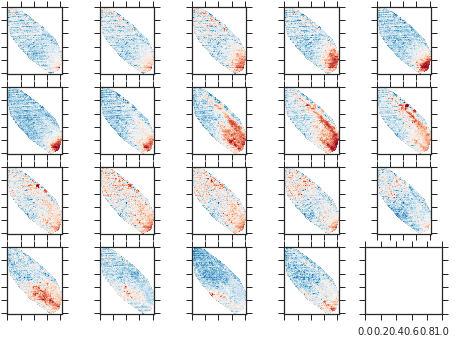

In [87]:
fig = figure(dpi=300)
plt.subplots(xplot, yplot, sharex=True, sharey=True)
for j in range(0,test.shape[0]):
	x = test[j]        
	corrs = norm.correlate(x)
	corrMat[j] = corrs.pack()
	plt.subplot(xplot, yplot, j+1);
	plt.imshow(corrMat[j], cmap='RdBu_r')
	ax = plt.gca()
	ax.set_xticklabels([])
	ax.set_yticklabels([])
	mdict['correlation'+str(j)]=str(corrMat[j])
scipy.io.savemat('/mnt/downloads/'+directory+'/correlation-'+str(dirnumber)+'.mat', mdict=mdict, oned_as='column', do_compression='true')
plt.savefig('/mnt/downloads/'+directory+'/correlation-'+str(dirnumber)+'.png', dpi=300, bbox_inches='tight')

In [86]:
corrMat=np.zeros((test.shape[0],norm.dims[0],norm.dims[1]),dtype=np.float64)

In [79]:
corrMat[1] = corrs.pack()

IndexError: list assignment index out of range

In [82]:
mdict['correlation'+str(0)]=str(corrMat[0])

IndexError: list index out of range

In [90]:
mdict('correlation0')

TypeError: 'dict' object is not callable